# Simulating a 2D Ising Model with Monte Carlo Method

### Sumer Malhotra (3035347457) | Olivia Jackson (3035653399) 
### Saad Mohiuddin (3035492989) | Patrick Li (3035654795)

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import *
import timeit
#run time calculation feature added.

## User-defined Functions

In [2]:
def spinGenerator():
    x = random()
    if x > 0.5:
        return 1
    return -1

def computeNeighbors(lattice, x, y):
    vals = [-1, 1]
    sum = 0
    for i in vals:
        if (x+i) % len(lattice) == 0 and x+i != 0:
            x1 = 0
        else:
            x1 = x+i
        if (y+i) % len(lattice) == 0 and y+i != 0:
            y1 = 0
        else:
            y1 = y+i
        sum += lattice[x1][y] + lattice[x][y1]
    return sum

def generateLattice(dimensions):
    return np.array([[spinGenerator() for i in range(dimensions)] for j in range(dimensions)])

def energy(lattice, n):
    energy=0
    for x in range(0, n):
        for y in range(0, n):
            energy += lattice[x,y] * nsum(x, y, lattice)
    return -energy/2

def magnetization(lattice, n):
    return np.sum(lattice)/(n**2)

def nsum(x, y, lattice):
    vals = [-1, 1]
    sum = 0
    for i in vals:
        if (x+i) % len(lattice) == 0 and (x+i) != 0:
            x1 = 0
        else:
            x1 = x+i
        if (y+i) % len(lattice) == 0 and (y+i) != 0:
            y1 = 0
        else:
            y1 = y+i
        sum += lattice[x1][y] + lattice[x][y1]
    return sum

## Simulation of the lattice at a Temperature, T

0.1
0.2689655172413793
0.4379310344827586
0.6068965517241379
0.7758620689655172
0.9448275862068966
1.113793103448276
1.2827586206896553
1.4517241379310346
1.620689655172414
1.7896551724137932
1.9586206896551726
2.127586206896552
2.2965517241379314
2.4655172413793105
2.6344827586206896
2.803448275862069
2.9724137931034487
3.1413793103448278
3.310344827586207
3.4793103448275864
3.648275862068966
3.817241379310345
3.986206896551724
4.155172413793103
4.324137931034483
4.493103448275862
4.662068965517241
4.8310344827586205
5.0
d = 32
average E graph
d = 32
average m graph


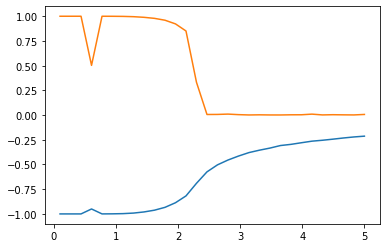

Time:  5183.097674385999


In [15]:
def run():
    
    samplerate = int(1E5)
    #this mean sample the m&E at the moment for every 'smaplerate' iteration
    operation = int(3E7)
    #the total iteration for one temperature
    alpha = 0.5
    #the portion of the data at the end of each cycle with particular T for the calculation of average m&E
    temp_iterations = 30
    #the number of temperature assess in the programme
    T_max = 5
    T_min = 0.1          #this cannot be zero
    T_list = np.linspace(T_min, T_max, num=temp_iterations)
    #specify the maximum and minimum temperature and construct the list of temperature
    
    
    for d in range(8, 9):
        dim = 4*d
        T_values = []
        average_E = []
        average_m = []

        
        for i in range(temp_iterations):

            T = T_list[i]
            #get the temperature from pre-constructed list
            iteration = range(operation)
            m = 0
            E = 0
            #variable 'm', 'E' are used to sum all the data point m, E value
            
            j = 0
            #preset the samplerate counter
            k = 0
            #counter for the number of data point used to calculate the mean value
            
            
            
            Pro4 = np.exp(-4/T)
            Pro8 = np.exp(-8/T)
            #these two are the pobabilities of fliping the element when dE is 4 and 8
            
            

            lattice = generateLattice(dim)
            #generate Lattice for each temperature
            


            data_min = round((1 - alpha) * len(iteration))
            data_max = round((len(iteration)))
            #calculate the upper and lower bound of the sampling range

            
            
            
            for i in iteration:
                x = randrange(0, dim)
                y = randrange(0, dim)
                target = (-1) * lattice[x, y]

                dEhalf = - nsum(x, y, lattice) * target
                #as when '-1' change to '1', the change of E is alway twice of the neighboring sum.

                if dEhalf <= 0:
                    lattice[x, y] = target
                elif dEhalf == 2:
                    if Pro4 > random():
                        lattice[x, y] = target
                        #when dE/2 equal to 2, use the probability of dE equal to 4, which is Pro4
                elif dEhalf == 4:
                    if Pro8 > random():
                        lattice[x, y] = target
                        #when dE/2 equal to 4, use the probability of dE equal to 8, which is Pro8
                        
                        
                if i > data_min and i < data_max:
                    j += 1
                    #bump up the samplerate counter
                    if j%samplerate==0:
                        #every 'samplerate' amout of iteration, collect the data
                        m += magnetization(lattice, dim)
                        E += energy(lattice, dim)
                        k += 1
                        #bump up the number of sample counter

            
            meanE = E/k
            meanm = m/k
            #taking average
            
            print(T)
            T_values.append(T)
            average_E.append(meanE)
            average_m.append(abs(meanm))
            #using the absolute value of m as it is expected to converge to either 1 or -1
            


            #plt.plot(iteration, m)
            #plt.show()
            #plt.plot(iteration, E, color='red')
            #plt.show()
            
            
        rescale_E = np.zeros(len(average_E))
        for i in range(len(average_E)):
            rescale_E[i] = float(average_E[i])/(2*(4*d)**2)
            #rescale the total energy E with the maximum energy 2*32**2
            
        print('d = '+ str(dim))
        print('average E graph')
        plt.plot(T_values, rescale_E)
        print('d = '+ str(dim))
        print('average m graph')
        plt.plot(T_values, average_m)
        plt.show()

        
        
start = timeit.default_timer()
run()
stop = timeit.default_timer()
#timer
print('Time: ', stop - start)